## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [2]:
file_path = r"C:\Users\nikhi\OneDrive\Documents\DATA SCIENCE\PROJECTS\18-Flight_Price_Predictor\DATA\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-18,Delhi,Cochin,02:15:00,04:25:00,1570,1.0,In-flight meal not included,12373
1,Spicejet,2019-05-27,Chennai,Kolkata,08:20:00,10:35:00,135,0.0,No check-in baggage included,3543
2,Indigo,2019-04-27,Banglore,Delhi,00:30:00,03:25:00,175,0.0,No Info,4591
3,Air India,2019-05-21,Kolkata,Banglore,14:15:00,16:45:00,150,0.0,No Info,5510
4,Air India,2019-04-09,Banglore,Delhi,17:00:00,19:50:00,170,0.0,No Info,5911
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-06-06,Delhi,Cochin,19:15:00,19:00:00,1425,1.0,No Info,14714
636,Indigo,2019-04-01,Kolkata,Banglore,09:20:00,14:15:00,295,1.0,No Info,10308
637,Jet Airways,2019-05-01,Kolkata,Banglore,09:35:00,19:10:00,575,1.0,In-flight meal not included,9314
638,Indigo,2019-05-01,Banglore,Delhi,07:10:00,10:05:00,175,0.0,No Info,4823


### 2.1 Fixing Data Types

In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-18,Delhi,Cochin,2024-06-09 02:15:00,2024-06-09 04:25:00,1570,1.0,In-flight meal not included,12373
1,Spicejet,2019-05-27,Chennai,Kolkata,2024-06-09 08:20:00,2024-06-09 10:35:00,135,0.0,No check-in baggage included,3543
2,Indigo,2019-04-27,Banglore,Delhi,2024-06-09 00:30:00,2024-06-09 03:25:00,175,0.0,No Info,4591
3,Air India,2019-05-21,Kolkata,Banglore,2024-06-09 14:15:00,2024-06-09 16:45:00,150,0.0,No Info,5510
4,Air India,2019-04-09,Banglore,Delhi,2024-06-09 17:00:00,2024-06-09 19:50:00,170,0.0,No Info,5911
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-06-06,Delhi,Cochin,2024-06-09 19:15:00,2024-06-09 19:00:00,1425,1.0,No Info,14714
636,Indigo,2019-04-01,Kolkata,Banglore,2024-06-09 09:20:00,2024-06-09 14:15:00,295,1.0,No Info,10308
637,Jet Airways,2019-05-01,Kolkata,Banglore,2024-06-09 09:35:00,2024-06-09 19:10:00,575,1.0,In-flight meal not included,9314
638,Indigo,2019-05-01,Banglore,Delhi,2024-06-09 07:10:00,2024-06-09 10:05:00,175,0.0,No Info,4823


## 3. High-level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,636.851562,0.812500,9042.779688
std,512.344378,0.670762,5050.835821
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5616.750000
50%,492.500000,1.000000,8080.000000
75%,965.000000,1.000000,12284.000000
max,2345.000000,4.000000,79512.000000


In [8]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,5.0,6
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,215,254,254,341.0,505


## 4. High-level analysis of Missing Values

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [10]:
# gives the number of missing values

temp = pd.read_csv(r"C:\Users\nikhi\OneDrive\Documents\DATA SCIENCE\PROJECTS\18-Flight_Price_Predictor\DATA\train.csv")

eda_helper_functions.missing_info(temp)

,count,percentage
variable,,


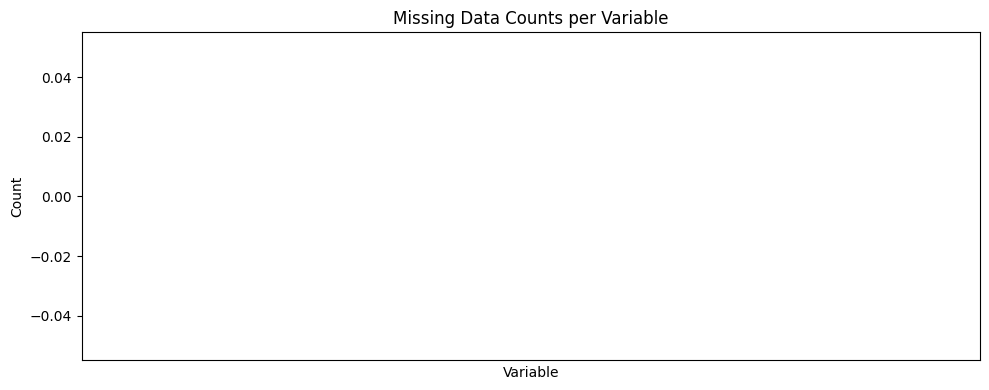

In [11]:
eda_helper_functions.plot_missing_info(temp)

## 5. High-level analysis of Outliers

In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [13]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-05-18,Delhi,Cochin,2024-06-09 02:15:00,2024-06-09 04:25:00,1570,1.0,In-flight meal not included,12373,-1
1,Spicejet,2019-05-27,Chennai,Kolkata,2024-06-09 08:20:00,2024-06-09 10:35:00,135,0.0,No check-in baggage included,3543,-1
7,Jet Airways,2019-06-12,Delhi,Cochin,2024-06-09 09:40:00,2024-06-09 04:25:00,1125,2.0,In-flight meal not included,10368,-1
8,Jet Airways,2019-05-24,Kolkata,Banglore,2024-06-09 20:25:00,2024-06-09 14:25:00,1080,1.0,No Info,12121,-1
11,Jet Airways,2019-03-24,Kolkata,Banglore,2024-06-09 16:55:00,2024-06-09 18:10:00,1515,1.0,In-flight meal not included,11134,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Air India,2019-05-21,Kolkata,Banglore,2024-06-09 12:00:00,2024-06-09 21:50:00,590,2.0,No Info,10151,-1
630,Jet Airways,2019-03-24,Kolkata,Banglore,2024-06-09 19:45:00,2024-06-09 19:40:00,1435,1.0,No Info,13759,-1
631,Jet Airways,2019-03-12,Banglore,New Delhi,2024-06-09 20:35:00,2024-06-09 19:10:00,1355,1.0,In-flight meal not included,11087,-1
634,Air India,2019-05-21,Delhi,Cochin,2024-06-09 05:00:00,2024-06-09 19:15:00,2295,2.0,No Info,9968,-1


## 6. Pair Plots

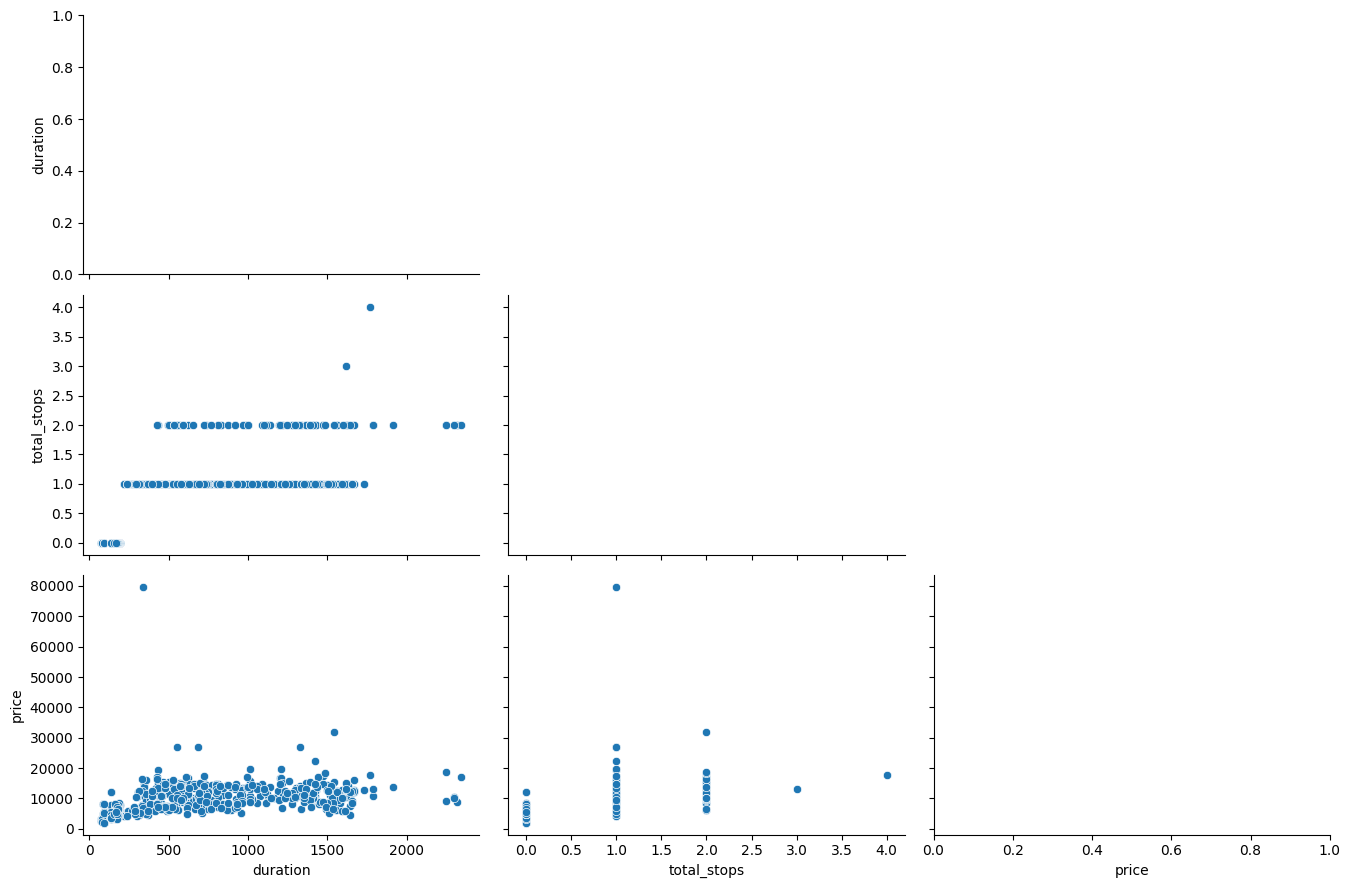

In [14]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

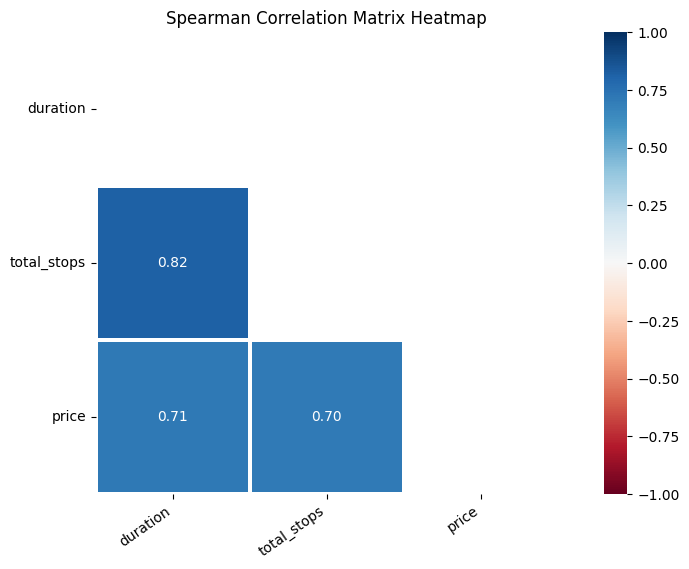

In [15]:
eda_helper_functions.correlation_heatmap(train)

In [16]:
train.corr(method="spearman",numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.819479,0.713737
total_stops,0.819479,1.000000,0.703730
price,0.713737,0.703730,1.000000


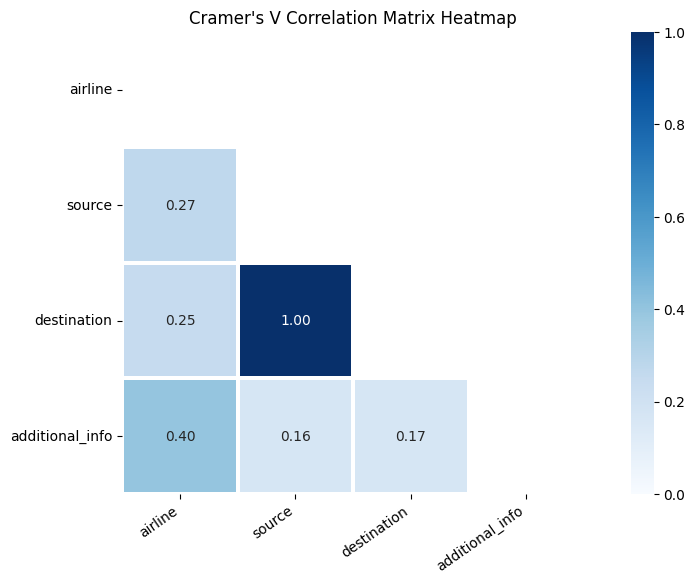

In [17]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [18]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [19]:
train.airline

0      Jet Airways
1         Spicejet
2           Indigo
3        Air India
4        Air India
          ...     
635    Jet Airways
636         Indigo
637    Jet Airways
638         Indigo
639        Vistara
Name: airline, Length: 640, dtype: object

In [20]:
eda_helper_functions.cat_summary(train, "airline")

0      Jet Airways
1         Spicejet
2           Indigo
3        Air India
4        Air India
          ...     
635    Jet Airways
636         Indigo
637    Jet Airways
638         Indigo
639        Vistara
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,215


,count,percentage
category,,
Jet Airways,215,0.335938
Indigo,128,0.200000
Air India,105,0.164062
Multiple Carriers,72,0.112500
Spicejet,53,0.082812
Vistara,41,0.064062
Air Asia,17,0.026562
Goair,9,0.014063


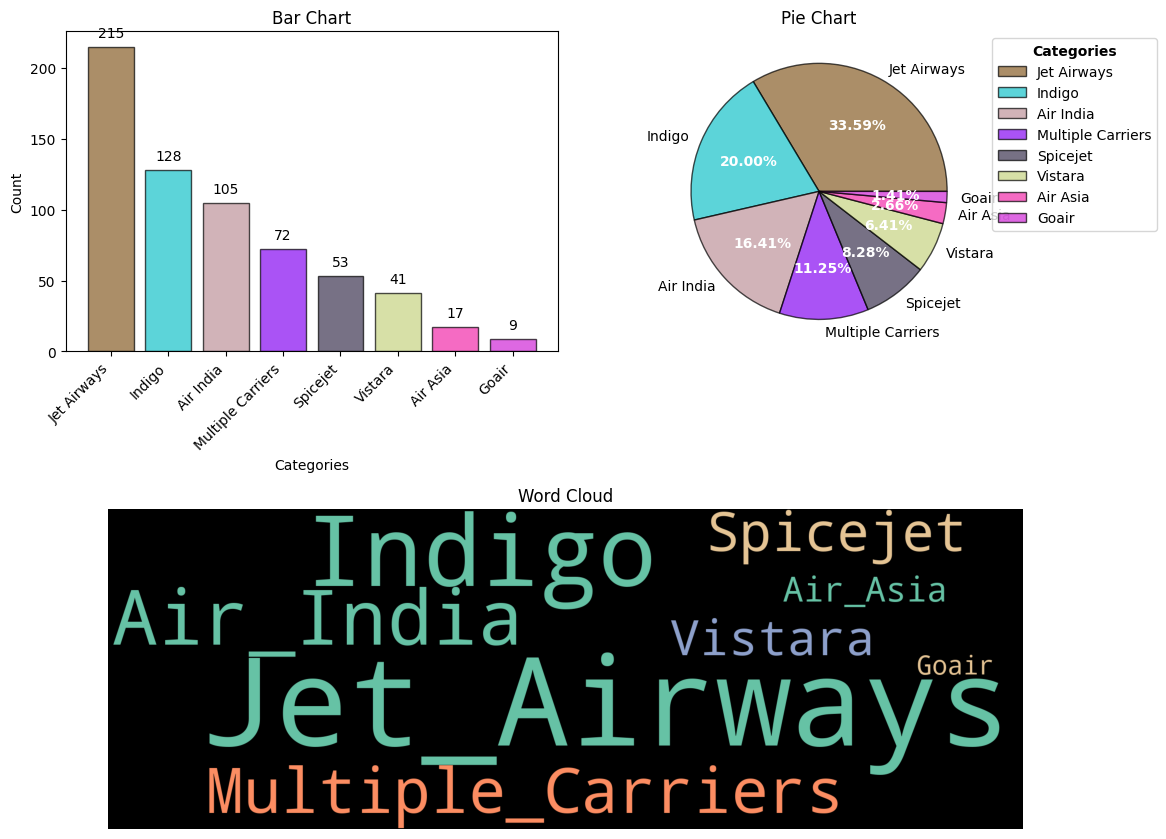

In [21]:
eda_helper_functions.cat_univar_plots(train, "airline")

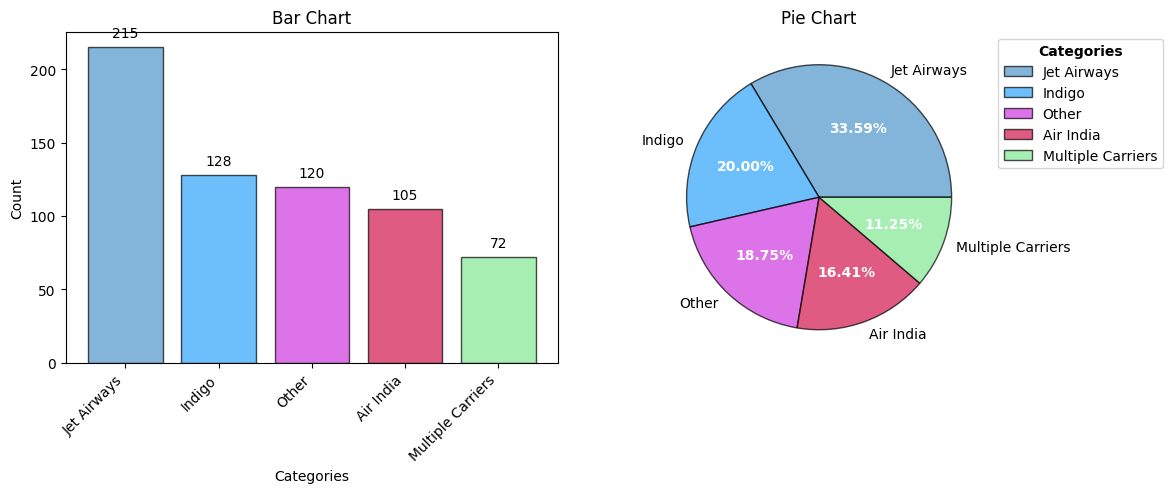

In [22]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=4) # k give us top 4 and other

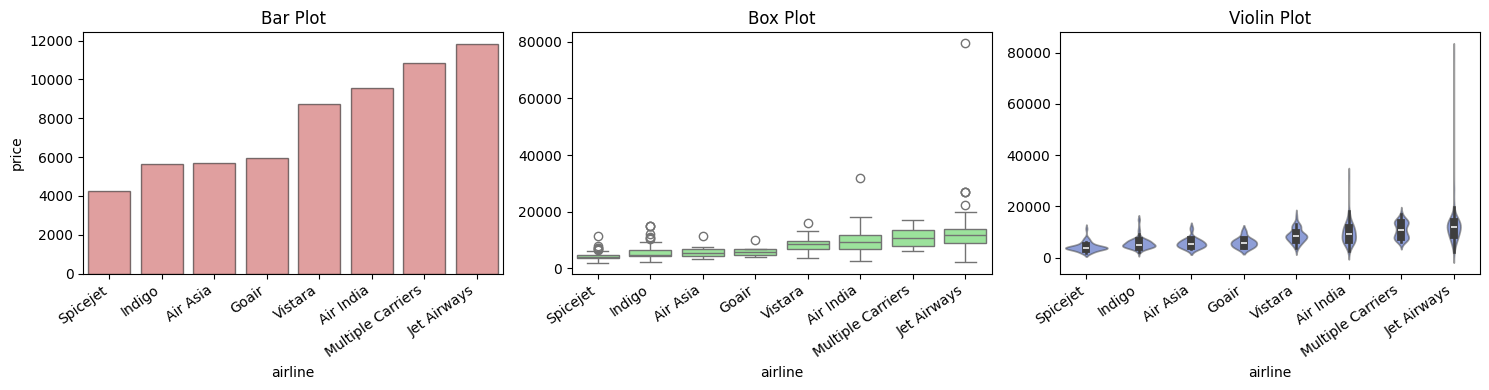

In [23]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [24]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 38.85985484308034
- p-value              : 2.051879262708855e-45
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 306.86259166265074
- p-value              : 2.0698132651864873e-62
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


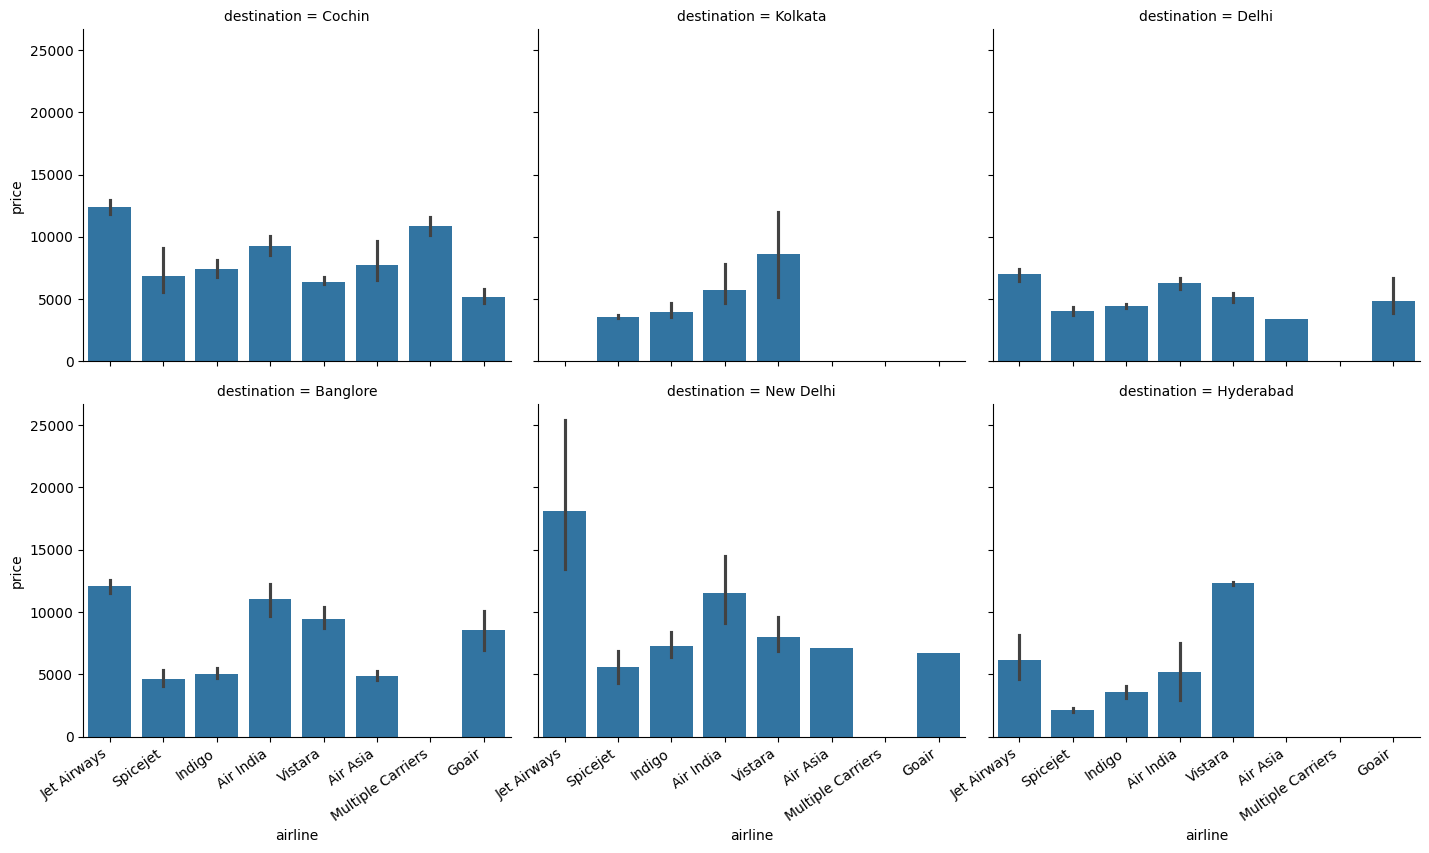

In [25]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [26]:
train.date_of_journey

0     2019-05-18
1     2019-05-27
2     2019-04-27
3     2019-05-21
4     2019-04-09
         ...    
635   2019-06-06
636   2019-04-01
637   2019-05-01
638   2019-05-01
639   2019-04-03
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

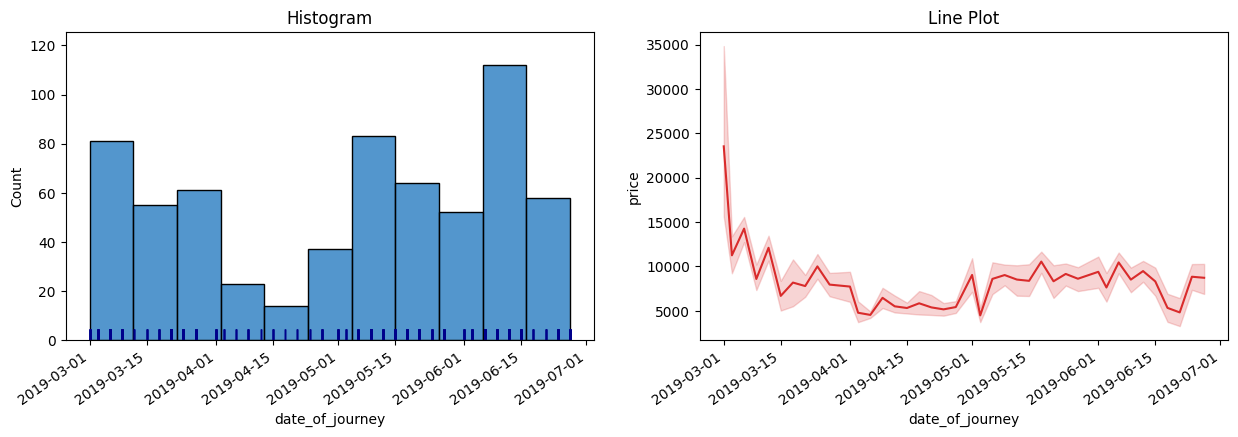

In [27]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

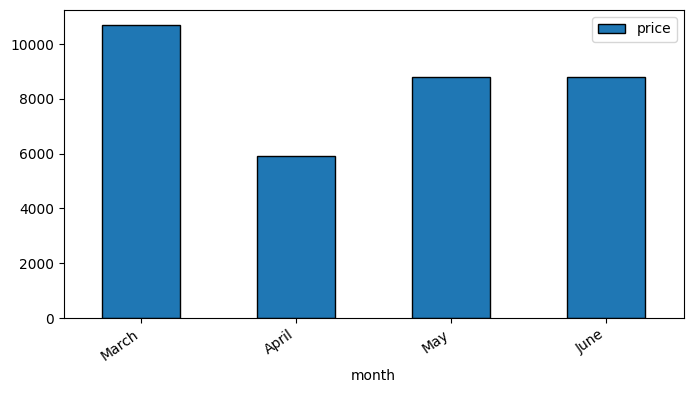

In [28]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

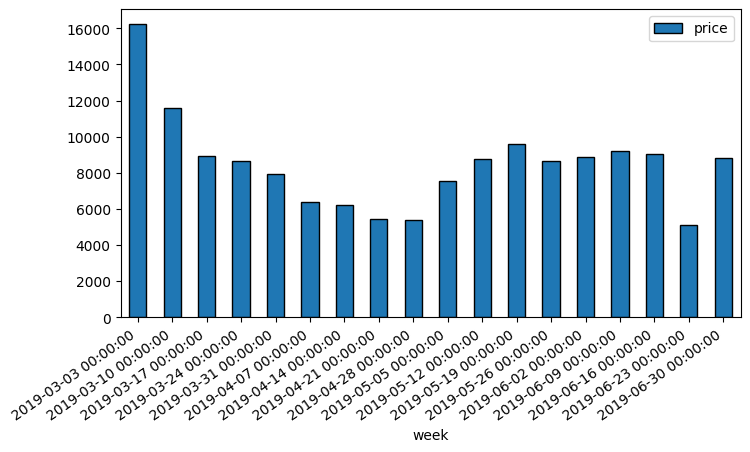

In [29]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

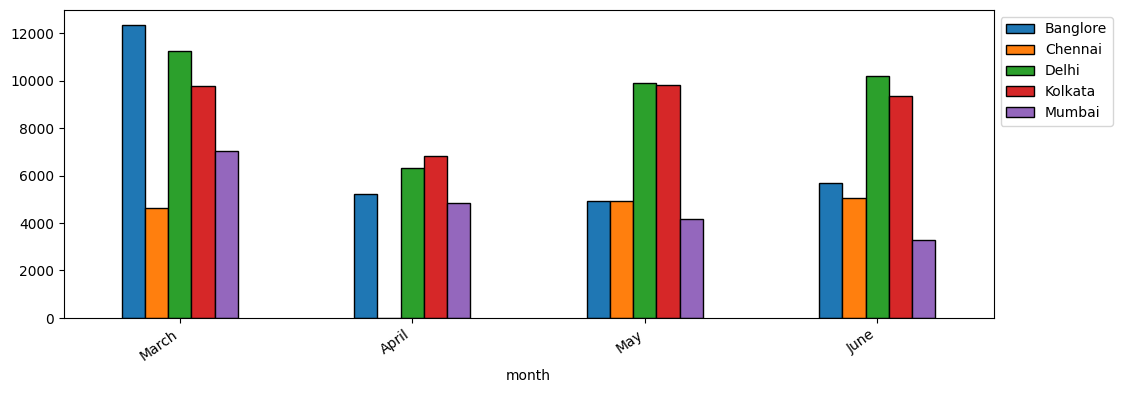

In [30]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [31]:
train.dep_time

0     2024-06-09 02:15:00
1     2024-06-09 08:20:00
2     2024-06-09 00:30:00
3     2024-06-09 14:15:00
4     2024-06-09 17:00:00
              ...        
635   2024-06-09 19:15:00
636   2024-06-09 09:20:00
637   2024-06-09 09:35:00
638   2024-06-09 07:10:00
639   2024-06-09 11:30:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

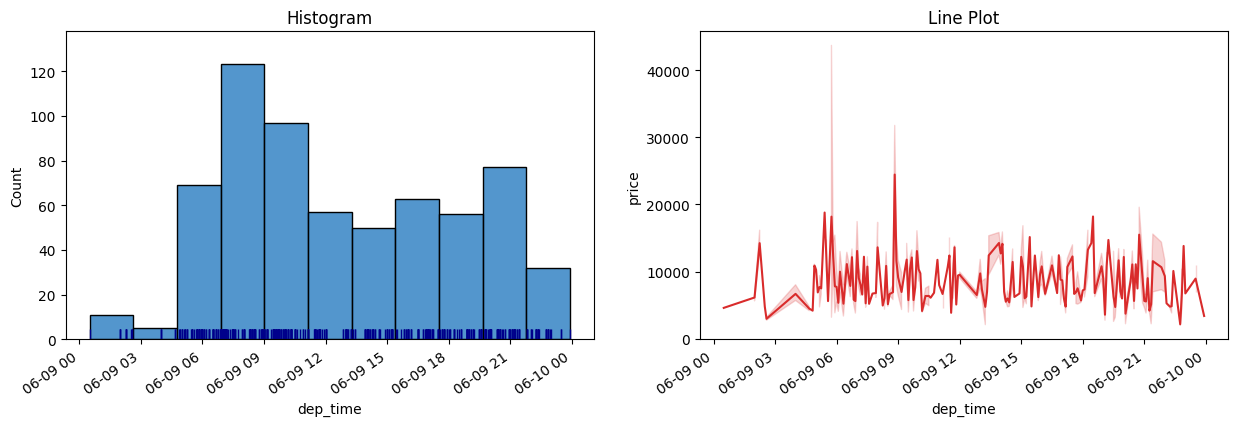

In [32]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

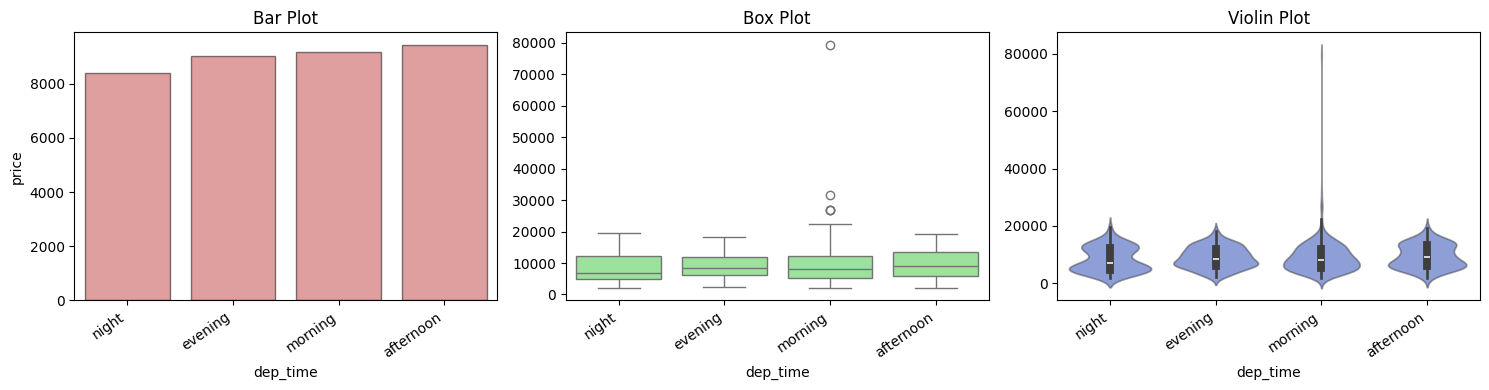

In [33]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [34]:
train.duration

0      1570
1       135
2       175
3       150
4       170
       ... 
635    1425
636     295
637     575
638     175
639     170
Name: duration, Length: 640, dtype: int64

In [35]:
eda_helper_functions.num_summary(train, "duration")

0      1570
1       135
2       175
3       150
4       170
       ... 
635    1425
636     295
637     575
638     175
639     170
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,492.50
75,965.00
90,1456.50
95,1610.25
99,1866.25


,value
mean,636.851562
trimmed mean (5%),603.567708
trimmed mean (10%),575.546875
median,492.500000


,value
var,262496.761969
std,512.344378
IQR,795.000000
mad,322.500000
coef_variance,0.804496


,value
skewness,0.888731
kurtosis,-0.127289


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.31874297064495e-22
Test Statistic       : 0.8808236506886511
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.55383410108675
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [36]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    492.5
0.75    965.0
Name: duration, dtype: float64

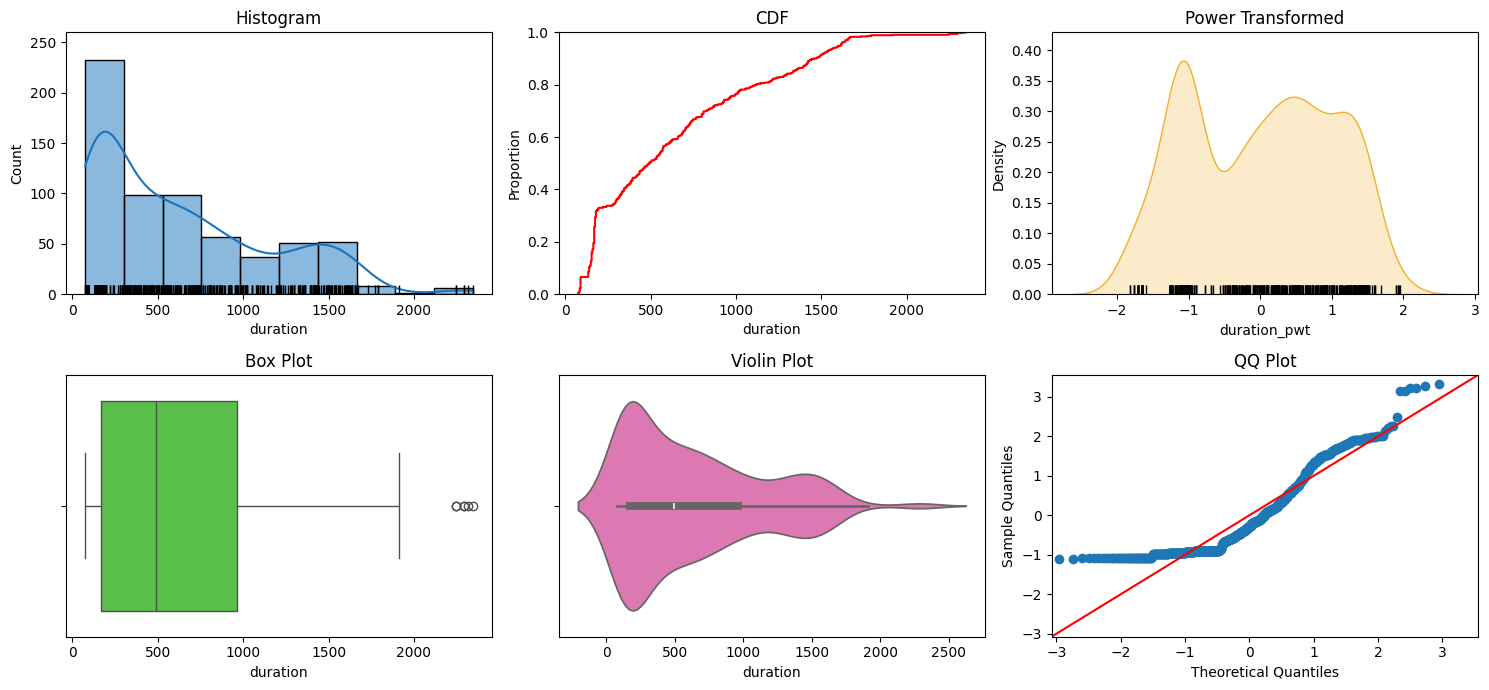

In [37]:
eda_helper_functions.num_univar_plots(train, "duration")

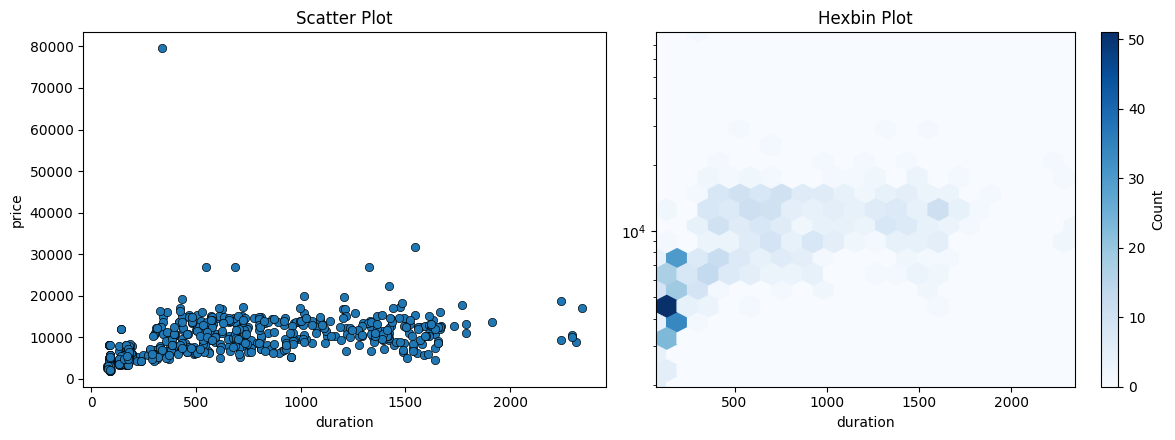

In [38]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [39]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.46651029156912854
- p-value              : 6.702740761899222e-36
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7137365384265074
- p-value              : 9.586334274853664e-101
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


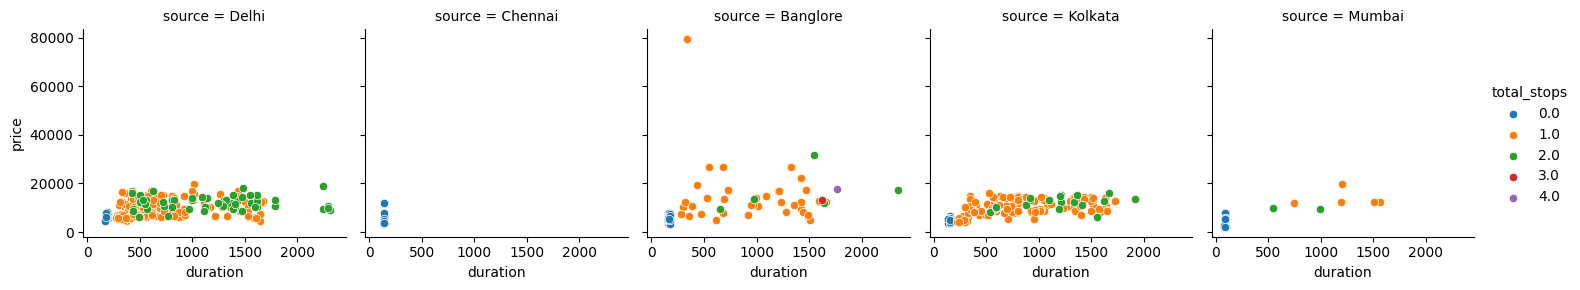

In [40]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

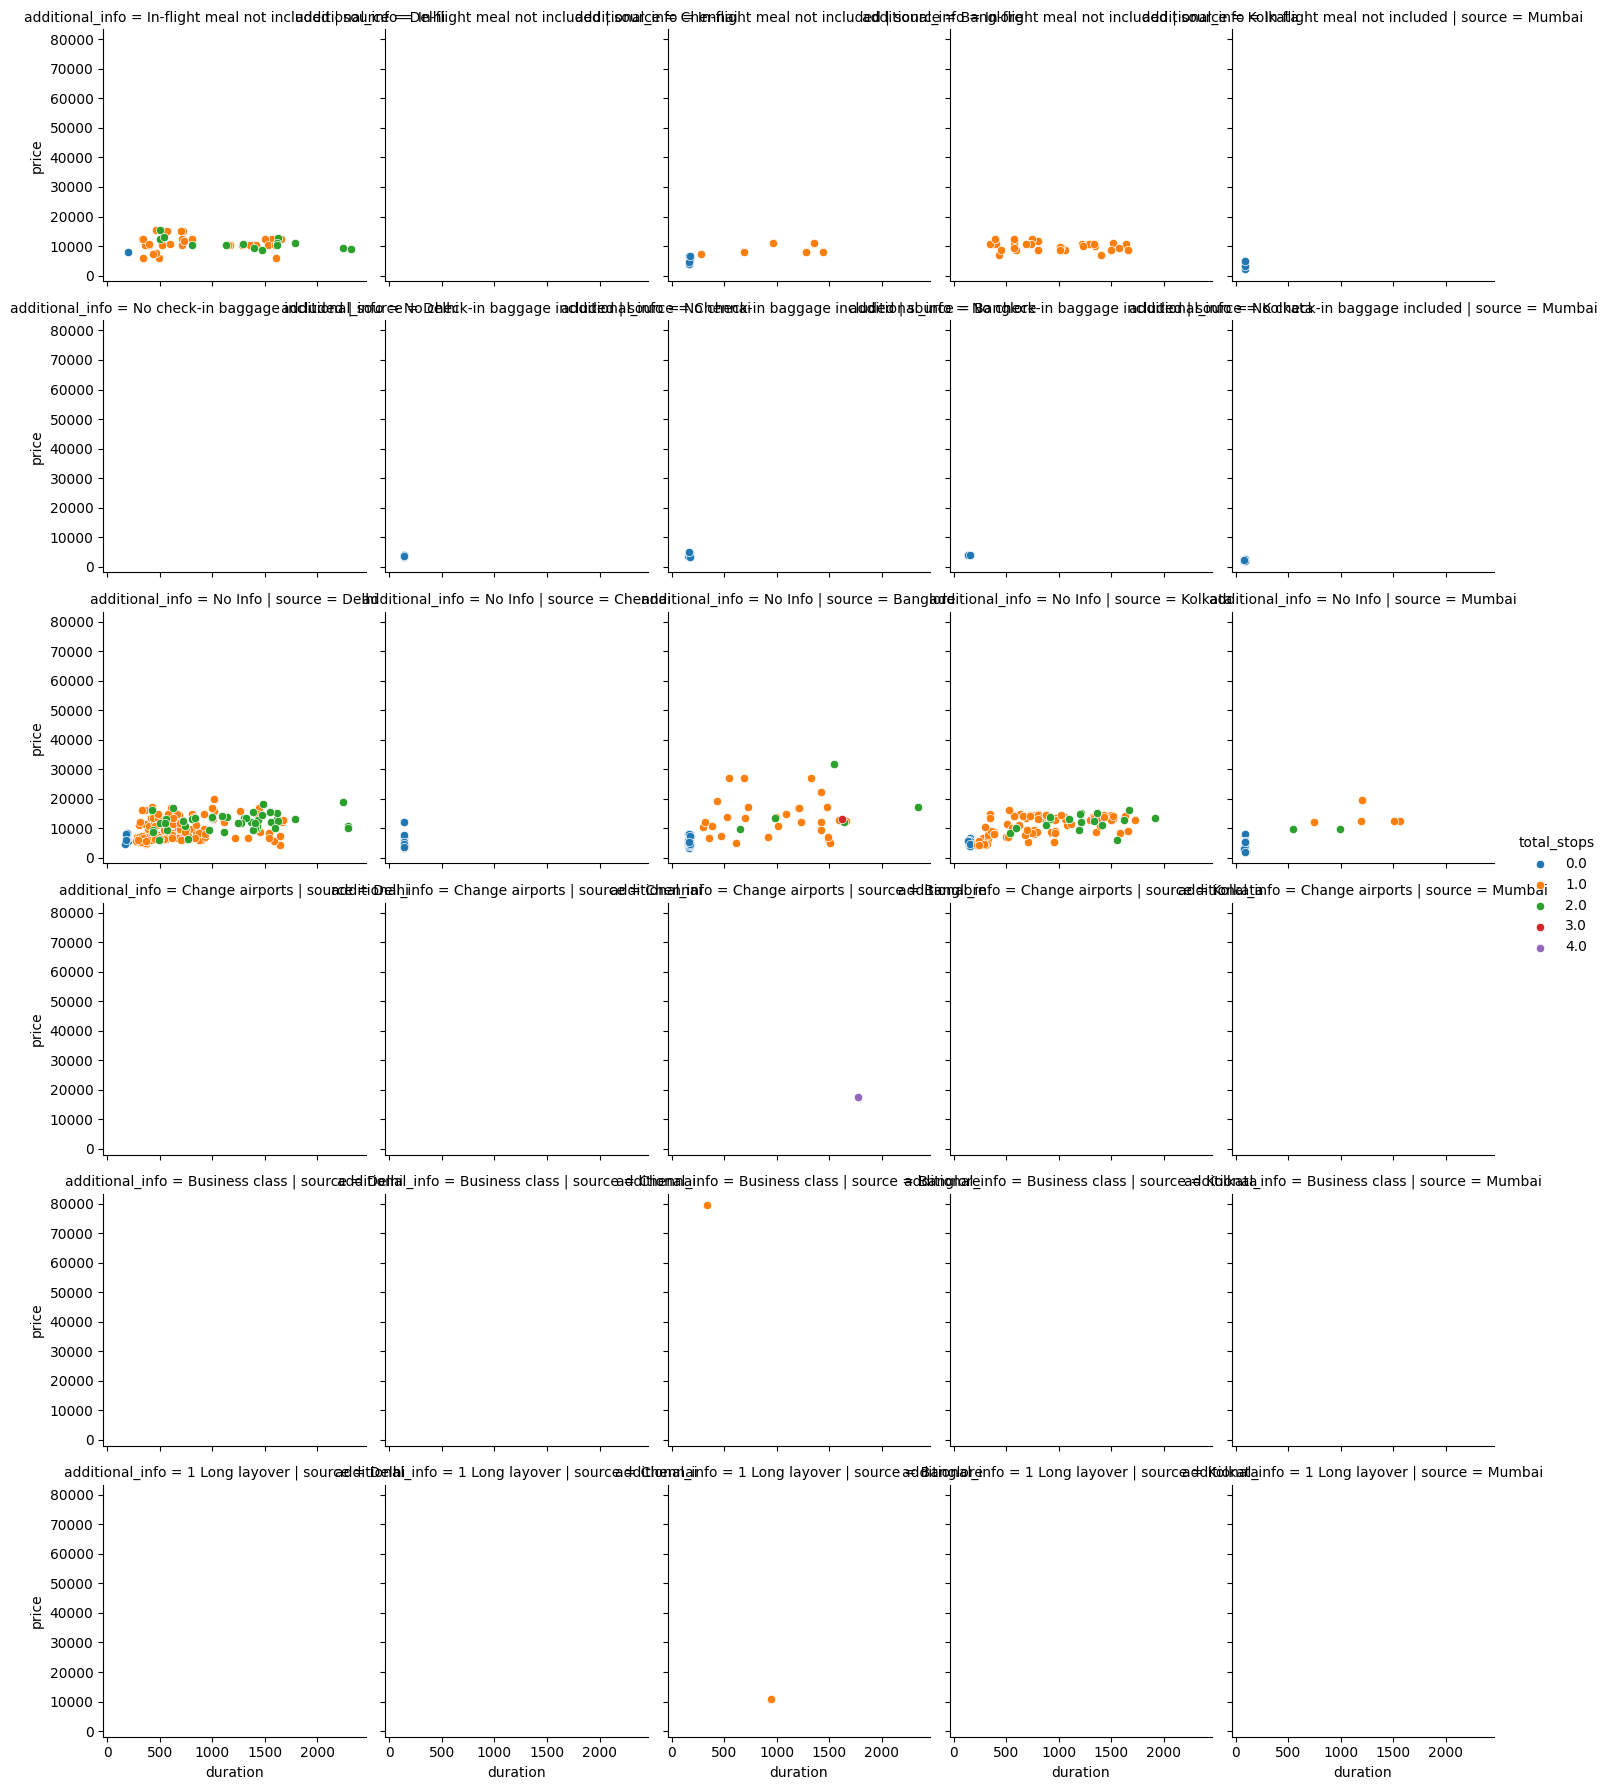

In [41]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [42]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -1022.5
Upper Limit : 2157.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
332,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-09 06:20:00,2024-06-09 19:45:00,2245,2.0,In-flight meal not included,9296
625,Jet Airways,2019-03-03,Delhi,Cochin,2024-06-09 05:25:00,2024-06-09 18:50:00,2245,2.0,No Info,18799
298,Air India,2019-03-09,Delhi,Cochin,2024-06-09 05:00:00,2024-06-09 19:15:00,2295,2.0,No Info,10598
634,Air India,2019-05-21,Delhi,Cochin,2024-06-09 05:00:00,2024-06-09 19:15:00,2295,2.0,No Info,9968
28,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-09 05:10:00,2024-06-09 19:45:00,2315,2.0,In-flight meal not included,8938
305,Air India,2019-03-01,Banglore,New Delhi,2024-06-09 08:50:00,2024-06-09 23:55:00,2345,2.0,No Info,17135


### 8.5 additional_info

In [43]:
eda_helper_functions.cat_summary(train, "additional_info")

0       In-flight meal not included
1      No check-in baggage included
2                           No Info
3                           No Info
4                           No Info
                   ...             
635                         No Info
636                         No Info
637     In-flight meal not included
638                         No Info
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,6
top,No Info
freq,505


,count,percentage
category,,
No Info,505,0.789062
In-flight meal not included,103,0.160938
No check-in baggage included,29,0.045312
Change airports,1,0.001563
Business class,1,0.001563
1 Long layover,1,0.001563


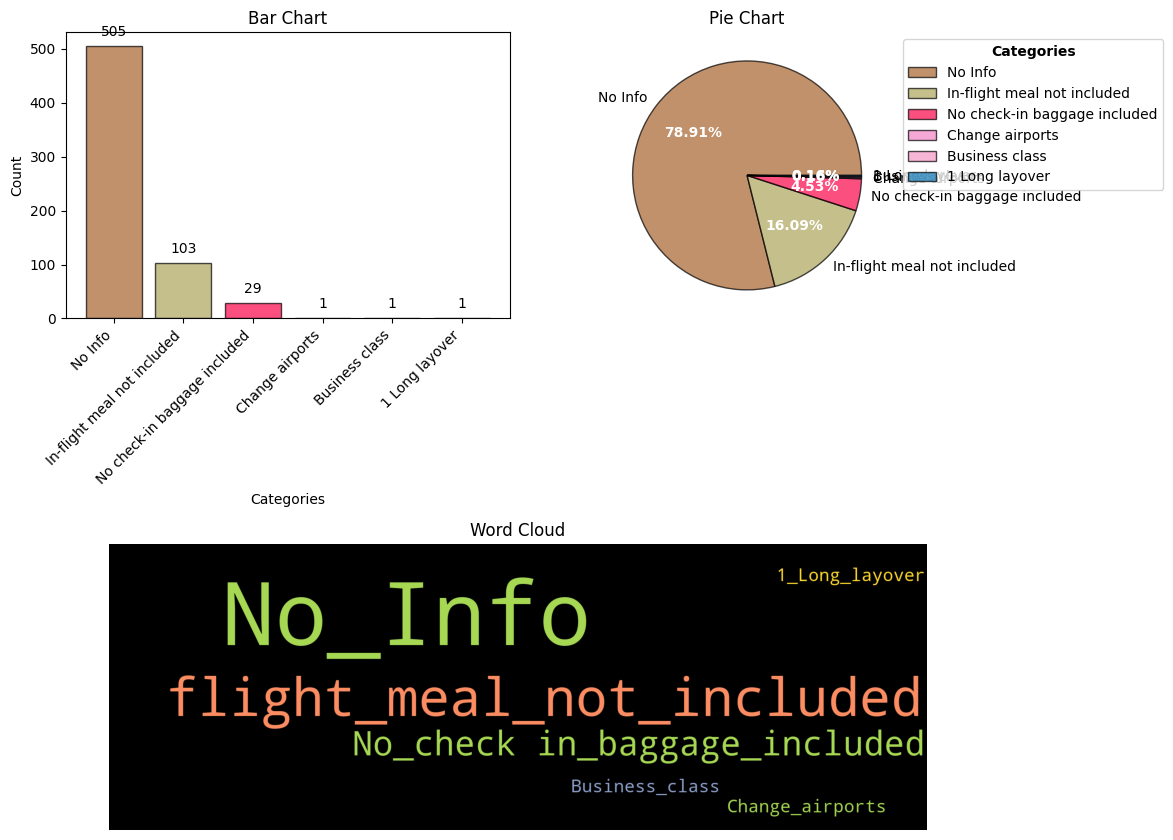

In [44]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

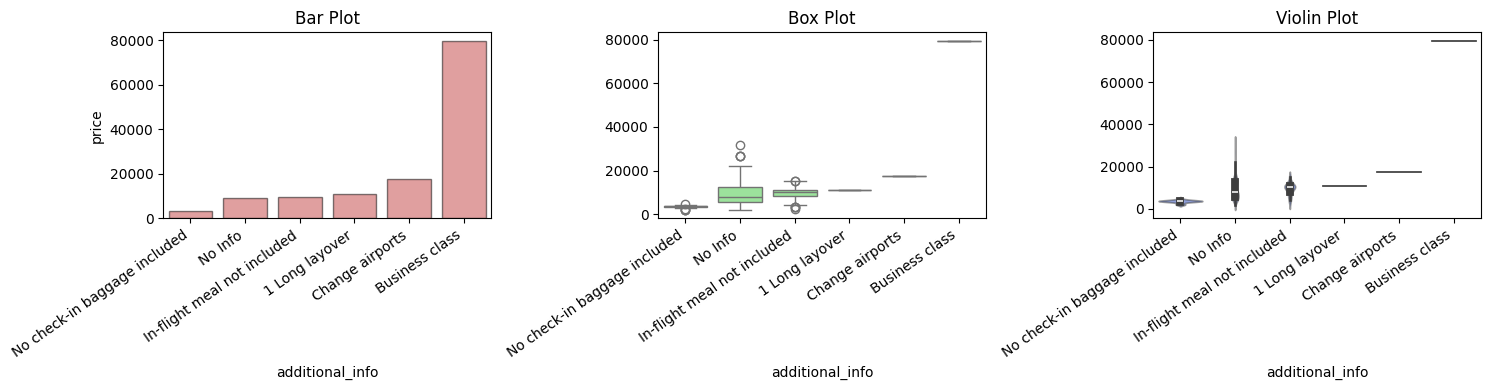

In [45]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

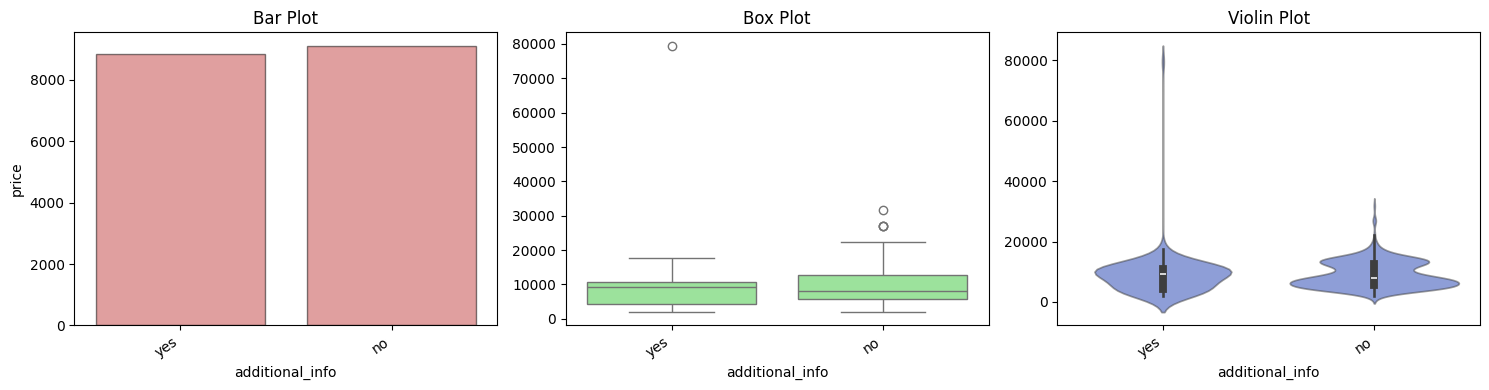

In [46]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- `additional_info` has severely rare categories
- Converted it into a binary feature for further analysis

## 9. Automated EDA

In [64]:
# from ydata_profiling import ProfileReport

In [65]:
# report = ProfileReport(train)

In [66]:
# report.to_file(output_file="output.html")